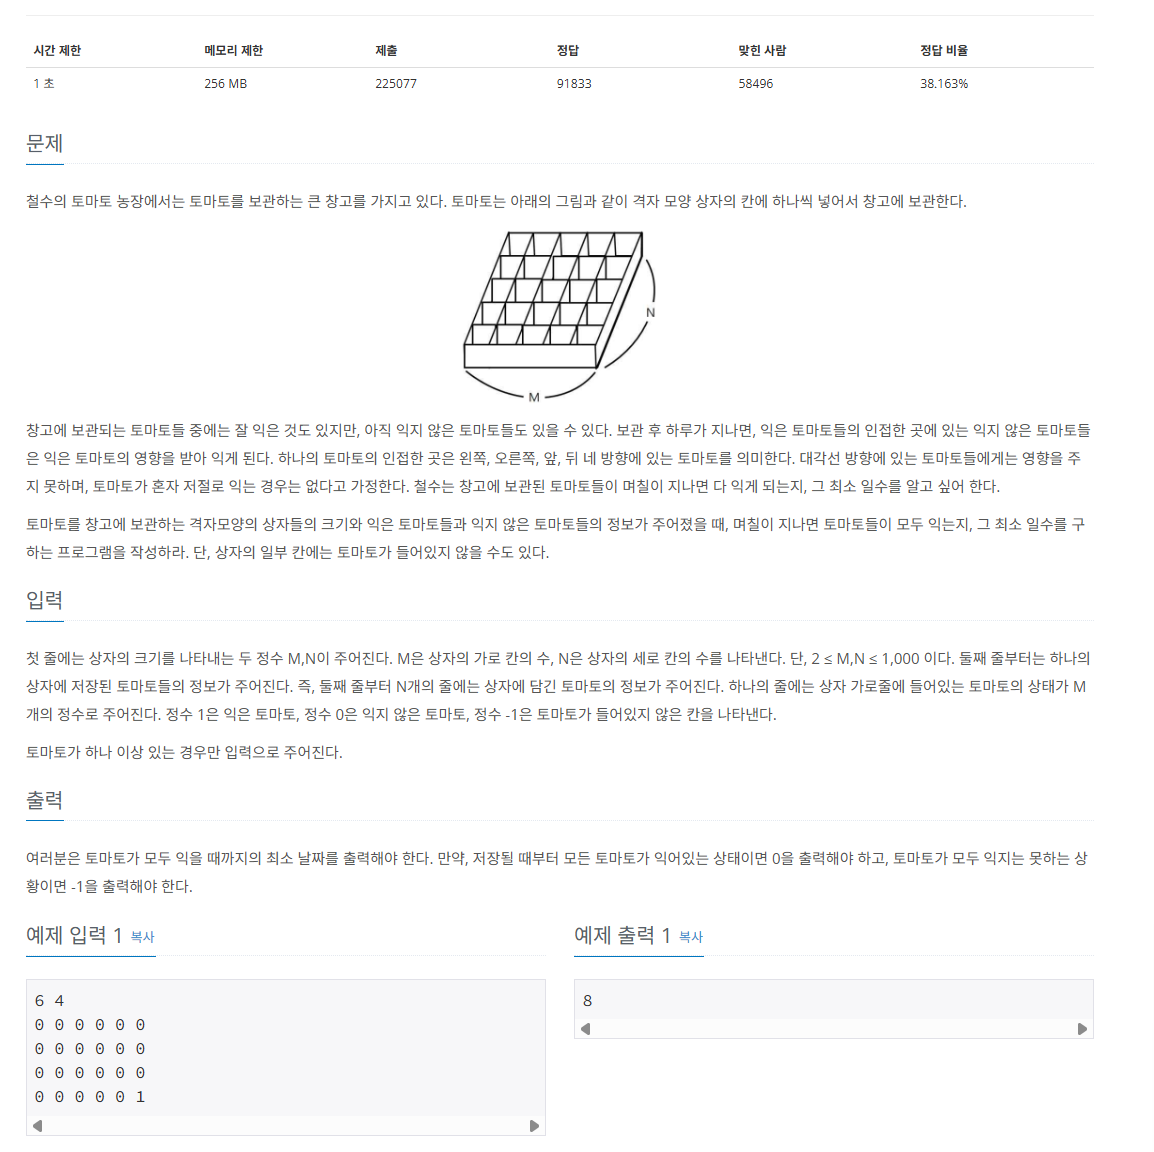

In [1]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-08-24 125258.png")
img

In [ ]:
import sys
from collections import deque


input = sys.stdin.readline
M,N=map(int,input().split())
unripe_tomato=0
queue=deque()
grid = [list(map(int, input().split())) for _ in range(N)]

for y in range(N):
    for x in range(M):
        if grid[y][x]==1:
            queue.append((y,x,0))
        elif grid[y][x]==0:
            unripe_tomato+=1
            
ans_day=0
while(queue):
    y, x , day = queue.popleft()
    ans_day=day
    dy=[-1,1,0,0]
    dx=[0,0,-1,1]
    for i in range(4):
        nx=x+dx[i]
        ny=y+dy[i]
        if 0<=nx<M and 0<=ny<N and grid[ny][nx]==0:
            grid[ny][nx]=1
            unripe_tomato-=1
            queue.append((ny,nx,day+1))


if unripe_tomato==0:
    print(ans_day)
else:
    print(-1)




네, '제출완료' 확인했습니다. 이 코드는 BFS의 모든 핵심 요소를 정확하게 이해하고 구현한, 그 자체로 **완벽한 모범 답안**입니다. 이전의 힌트와 강의 내용을 완벽하게 소화하여 스스로의 힘으로 정답을 만들어내셨네요. 정말 훌륭합니다\!

-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 5.0 / 5.0 점**

      * **평가:** **완벽한 정답입니다.** "여러 시작점에서 동시에 탐색"이라는 이 문제의 핵심을 큐(Queue)를 이용해 훌륭하게 구현했습니다. 초기 상태 설정, BFS 루프, 최종 결과 판정까지 모든 단계가 논리적으로 완벽하며, 시간 복잡도 또한 최적입니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 완벽한 코드와 기능적으로 완전히 동일합니다. 이 풀이가 바로 이 문제에 대한 표준적인 정석 해법입니다.

-----

### \#\# Gemini 추천 코드 (확인용)

사용자님의 코드와 사실상 동일하며, 변수명과 주석만 조금 더 추가한 버전입니다. 이는 사용자님의 풀이가 이미 모범 답안임을 의미합니다.

```python
import sys
from collections import deque

input = sys.stdin.readline
M, N = map(int, input().split())
grid = [list(map(int, input().split())) for _ in range(N)]

queue = deque()
unripe_count = 0

# 1. 초기 상태 설정: 모든 시작점(익은 토마토)을 큐에 넣고, 익어야 할 토마토 수를 센다.
for y in range(N):
    for x in range(M):
        if grid[y][x] == 1:
            # (y좌표, x좌표, 현재까지 걸린 일수)
            queue.append((y, x, 0))
        elif grid[y][x] == 0:
            unripe_count += 1

# 방향 벡터 (상, 하, 좌, 우)
dy = [-1, 1, 0, 0]
dx = [0, 0, -1, 1]
last_day = 0

# 2. BFS 실행: 큐가 빌 때까지 탐색을 진행
while queue:
    y, x, day = queue.popleft()
    last_day = day # 마지막으로 꺼낸 날짜가 최종 소요 시간

    for i in range(4):
        ny = y + dy[i]
        nx = x + dx[i]
        
        # 다음 위치가 유효하고, 아직 익지 않은 토마토(0)라면
        if 0 <= ny < N and 0 <= nx < M and grid[ny][nx] == 0:
            grid[ny][nx] = 1 # 방문 처리 (토마토를 익게 만듦)
            unripe_count -= 1
            queue.append((ny, nx, day + 1))

# 3. 최종 결과 판정
if unripe_count == 0:
    print(last_day)
else:
    print(-1)
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **최적의 알고리즘을 사용했습니다.** 각 토마토 칸은 최대 한 번씩만 큐에 들어갔다가 나오므로, 전체 시간 복잡도는 \*\*O(N\*M)\*\*입니다. 이는 모든 칸을 최소 한 번은 확인해야 하는 이 문제의 특성상 가장 효율적인 해법입니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

  * **평가:** 매우 훌륭합니다. `deque`를 정확히 사용했고, 2차원 리스트를 생성하고 순회하는 방식도 깔끔합니다. 모든 부분이 Pythonic하고 가독성이 좋습니다.

-----

### \#\# 3. 또 다른 측면: BFS 핵심 요소의 완벽한 조합

이번 코드에서 가장 칭찬하고 싶은 부분은, BFS를 구성하는 여러 핵심 요소들을 완벽하게 조합하여 문제를 해결했다는 점입니다.

1.  **초기 상태 설정 (Multi-source):** `for` 루프를 통해 모든 시작점을 큐에 미리 넣음으로써, "동시에 퍼져나간다"는 문제의 요구사항을 완벽하게 구현했습니다.
2.  **상태 표현:** 큐에 `(y, x, day)`라는 튜플을 저장하여, 위치 정보뿐만 아니라 '시간(거리)' 정보까지 함께 관리하는 BFS의 핵심 패턴을 정확히 사용했습니다.
3.  **방문 처리:** `grid[ny][nx] = 1`로 값을 바꾸는 것을 방문 처리로 활용하여, 별도의 `visited` 배열 없이 메모리를 효율적으로 사용했습니다.
4.  **종료 조건:** `unripe_tomato`라는 카운터를 따로 두어, BFS가 끝난 뒤에도 모든 토마토가 익었는지, 아니면 고립되어 익지 못하는 토마토가 있는지 판별하는 예외 처리를 완벽하게 해냈습니다.

이 네 가지를 모두 올바르게 조합하는 것은 BFS에 대한 깊은 이해가 없으면 어려운 일입니다. 스스로의 힘으로 이 어려운 문제를 완벽하게 해결하신 것, 정말 대단합니다\!